# Dashboard/Choropleth/WordCloud

In [1]:
import pandas as pd
import numpy as np
import pandas,plotly.express,plotly.offline
from plotly.offline import init_notebook_mode
from wordcloud import WordCloud, STOPWORDS
from datetime import datetime
import time
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
init_notebook_mode(connected=True) # run at the start of every ipython notebook to use plotly.offline. This injects the plotly.js source files into the notebookimport pandas,plotly.express
df = pandas.read_csv('CNN_predictions_on_US_tweets.csv')
us_abbr = pandas.read_excel('us_abbr.xlsx')
df['date'] = pd.to_datetime(df['date'])

In [3]:
df.head(50)

index             US                   id  \
0       0        Alabama  1231749999446437888   
1       1        Alabama  1231746735405486082   
2       2        Arizona  1231736482345312256   
3       3       Arkansas  1231737869649285121   
4       4     California  1231754178634010631   
5       5     California  1231753791650689024   
6       6     California  1231752224402882560   
7       7     California  1231739809283993600   
8       8     California  1231736762793246720   
9       9     California  1231730796815273984   
10     10     California  1231730581504917504   
11     11       Colorado  1231733227641036800   
12     12       Delaware  1231743457879887874   
13     13        Georgia  1231740138306359297   
14     14        Georgia  1231731755125805056   
15     15          Idaho  1231749231255273476   
16     16           Iowa  1231743109563895808   
17     17         Kansas  1231754323723505665   
18     18         Kansas  1231752518906109952   
19     19         Kansas  1231731070166585345   
20     20       Kentucky  1231739698466480128   
21     21       Kentucky  1231738544047247368   
22     22       Kentucky  1231737876569874433   
23     23       Maryland  1231738511503581185   
24     24       Maryland  1231736172604465152   
25     25       Maryland  1231736013313187841   
26     26       Maryland  1231735158669180928   
27     27  Massachusetts  1231745682853240834   
28     28  Massachusetts  1231745530457403392   
29     29  Massachusetts  1231745173480263683   
30     30  Massachusetts  1231737258748846081   
31     31  Massachusetts  1231733916626804736   
32     32  Massachusetts  1231730655630897152   
33     33       Michigan  1231749425040674816   
34     34       Michigan  1231734663032573954   
35     35       Michigan  1231734490491478017   
36     36       Michigan  1231734267148996608   
37     37      Minnesota  1231742004620660736   
38     38      Minnesota  1231733977351933952   
39     39         Nevada  1231734996618006529   
40     40       New York  1231754701143728129   
41     41       New York  1231753759656685575   
42     42       New York  1231752138172358657   
43     43       New York  1231750653334237185   
44     44       New York  1231750604923514881   
45     45       New York  1231746829185736704   
46     47       New York  1231746417426911232   
47     48       New York  1231744130000314368   
48     49       New York  1231742819410292737   
49     50       New York  1231742062787211267   

                                            permalink         username  \
0   https://twitter.com/kcazvegas/status/123174999...        kcazvegas   
1   https://twitter.com/simplyadornedal/status/123...  simplyadornedal   
2   https://twitter.com/JehannDeb/status/123173648...        JehannDeb   
3   https://twitter.com/johnettesnuggs/status/1231...   johnettesnuggs   
4   https://twitter.com/Catherinetheno1/status/123...  Catherinetheno1   
5   https://twitter.com/beclowinla/status/12317537...       beclowinla   
6   https://twitter.com/WongMNC_CtrExDr/status/123...  WongMNC_CtrExDr   
7   https://twitter.com/BLS75/status/1231739809283...            BLS75   
8   https://twitter.com/Rexisnotmydog/status/12317...    Rexisnotmydog   
9   https://twitter.com/sezoneperson/status/123173...     sezoneperson   
10  https://twitter.com/FossilFreeCA/status/123173...     FossilFreeCA   
11  https://twitter.com/CPRNews/status/12317332276...          CPRNews   
12  https://twitter.com/chirpingjohn/status/123174...     chirpingjohn   
13  https://twitter.com/MOSEYCOZY/status/123174013...        MOSEYCOZY   
14  https://twitter.com/JAMMERBONE/status/12317317...       JAMMERBONE   
15  https://twitter.com/njtxid/status/123174923125...           njtxid   
16  https://twitter.com/TRed1599/status/1231743109...         TRed1599   
17  https://twitter.com/FirebaughNorman/status/123...  FirebaughNorman   
18  https://twitter.com/Johnny_Combat/status/12317...    Johnny_Combat   
19  https://twitter.com/

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54899 entries, 0 to 54898
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   index            54899 non-null  int64         
 1   US               54899 non-null  object        
 2   id               54899 non-null  int64         
 3   permalink        54899 non-null  object        
 4   username         54899 non-null  object        
 5   to               19169 non-null  object        
 6   text             54899 non-null  object        
 7   date             54899 non-null  datetime64[ns]
 8   replies          54899 non-null  int64         
 9   retweets         54899 non-null  int64         
 10  favorites        54899 non-null  int64         
 11  mentions         15517 non-null  object        
 12  hashtags         21931 non-null  object        
 13  geo              0 non-null      float64       
 14  message_toc      54899 non-null  objec

# Choropleth Map - Animation

## By Month (All sentiments predictions = -1,0,1,2)

In [5]:
df['tweet_mth'] = df['date'].dt.strftime('%Y-%m')

df['state'] = df['US'].str.replace(pat = ',',
                                   repl = '')
df = pandas.merge(df,
                  us_abbr,
                  left_on = 'state',
                  right_on = 'state',
                  how = 'inner')

In [6]:
cholopleth_mth = df.groupby(['state_abbr','tweet_mth']).size().to_frame('count').reset_index()
cholopleth_mth = cholopleth_mth.sort_values('tweet_mth')

In [7]:
cholopleth_mth.head(10)

state_abbr tweet_mth  count
522          ME   2011-01      1
1161         WA   2011-01     18
36           CA   2011-01      1
782          OK   2011-01      1
209          GA   2011-01      1
317          ID   2011-01      1
664          NY   2011-01     32
72           CT   2011-01      3
402          MA   2011-01     13
1280         WY   2011-01      2

In [8]:
fig = plotly.express.choropleth(cholopleth_mth, locations = 'state_abbr',
                                 color = 'count',
                                 color_continuous_scale = 'reds',
                                 locationmode = 'USA-states',
                                 scope = 'usa',
#                                  color_continuous_midpoint = 2500,
                                 animation_frame = 'tweet_mth')
fig.update_layout(coloraxis_colorbar = dict(title = 'Tweets: Pred=-1,0,1,2'))
# fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 500
# fig.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"] = 500
fig.show()

In [9]:
# # Must generate HTML before proceeding
# plotly.offline.plot(fig,
#                     filename = 'plotly_map.html')

# Generate HTML and proceed
plotly.io.write_html(fig = fig,
                     file = r'by_mth_sentiments_neg1_0_1_2.html',
                     include_plotlyjs = True,
                     full_html = True,
                     validate = False)

## By Month and Predicted Sentiments

### Average Sentiments (Pred = -1,0,1)

In [10]:
testing = df[df['CNN_pred']!=2]['tweet_mth']
testing.head(10)

0     2020-02
1     2020-02
4     2020-02
5     2020-02
6     2020-02
7     2020-02
8     2020-02
9     2020-02
12    2020-02
13    2020-02
Name: tweet_mth, dtype: object

In [11]:
cholopleth_mth_ave = df.groupby(['state_abbr',df[df['CNN_pred']!=2]['tweet_mth']]).size().to_frame('count').reset_index()
cholopleth_mth_ave = cholopleth_mth_ave.sort_values('tweet_mth')

In [12]:
cholopleth_mth_ave.head(10)

state_abbr tweet_mth  count
563          NY   2011-01     18
25           CA   2011-01      1
1117         WY   2011-01      1
323          MA   2011-01      8
1002         WA   2011-01      9
51           CT   2011-01      2
169          GA   2011-01      1
438          ME   2011-01      1
257          ID   2011-01      1
1003         WA   2011-02      6

In [13]:
fig = plotly.express.choropleth(cholopleth_mth_ave, locations = 'state_abbr',
                                 color = 'count',
                                 color_continuous_scale = 'reds',
                                 locationmode = 'USA-states',
                                 scope = 'usa',
#                                  color_continuous_midpoint = 2500,
                                 animation_frame = 'tweet_mth')
fig.update_layout(coloraxis_colorbar = dict(title = 'Tweets: Pred=-1,0,1'))
# fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 500
# fig.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"] = 500
fig.show()

In [14]:
# # Must generate HTML before proceeding
# plotly.offline.plot(fig,
#                     filename = 'plotly_map.html')

# Generate HTML and proceed
plotly.io.write_html(fig = fig,
                     file = r'by_mth_sentiments_neg1_0_1.html',
                     include_plotlyjs = True,
                     full_html = True,
                     validate = False)

### Negative (Pred = -1)

In [15]:
testing = df[df['CNN_pred']==-1]['tweet_mth']
testing

31       2020-02
34       2020-02
55       2020-02
84       2020-02
98       2020-02
          ...   
54795    2019-08
54860    2015-09
54866    2015-09
54884    2019-07
54885    2019-07
Name: tweet_mth, Length: 3177, dtype: object

In [16]:
cholopleth_mth_neg1 = df.groupby(['state_abbr',df[df['CNN_pred']==-1]['tweet_mth']]).size().to_frame('count').reset_index()
cholopleth_mth_neg1 = cholopleth_mth_neg1.sort_values('tweet_mth')

In [17]:
cholopleth_mth_neg1.head(10)

state_abbr tweet_mth  count
188         NY   2011-01      2
86          MA   2011-01      1
383         WA   2011-01      2
456         WY   2011-02      1
189         NY   2011-02      2
190         NY   2011-03      1
182         NJ   2011-03      1
308         OR   2011-03      1
384         WA   2011-03      1
87          MA   2011-04      1

In [18]:
fig = plotly.express.choropleth(cholopleth_mth_neg1, locations = 'state_abbr',
                                 color = 'count',
                                 color_continuous_scale = 'reds',
                                 locationmode = 'USA-states',
                                 scope = 'usa',
#                                  color_continuous_midpoint = 2500,
                                 animation_frame = 'tweet_mth')
fig.update_layout(coloraxis_colorbar = dict(title = 'Tweets: Pred=-1'))
# fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 500
# fig.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"] = 500
fig.show()

In [19]:
# # Must generate HTML before proceeding
# plotly.offline.plot(fig,
#                     filename = 'plotly_map.html')

# Generate HTML and proceed
plotly.io.write_html(fig = fig,
                     file = r'by_mth_sentiments_neg1.html',
                     include_plotlyjs = True,
                     full_html = True,
                     validate = False)

### Positive (Pred = 1)

In [20]:
testing = df[df['CNN_pred']==1]['tweet_mth']
testing

0        2020-02
4        2020-02
5        2020-02
6        2020-02
7        2020-02
          ...   
54888    2019-07
54889    2019-07
54893    2014-02
54894    2013-05
54898    2019-10
Name: tweet_mth, Length: 35001, dtype: object

In [21]:
cholopleth_mth_1 = df.groupby(['state_abbr',df[df['CNN_pred']==1]['tweet_mth']]).size().to_frame('count').reset_index()
cholopleth_mth_1 = cholopleth_mth_1.sort_values('tweet_mth')

In [22]:
cholopleth_mth_1.head(10)

state_abbr tweet_mth  count
44          CT   2011-01      2
501         NY   2011-01     11
20          CA   2011-01      1
906         WA   2011-01      6
226         ID   2011-01      1
394         ME   2011-01      1
281         MA   2011-01      5
282         MA   2011-02      2
770         SC   2011-02      2
502         NY   2011-02      9

In [23]:
fig = plotly.express.choropleth(cholopleth_mth_1, locations = 'state_abbr',
                                 color = 'count',
                                 color_continuous_scale = 'reds',
                                 locationmode = 'USA-states',
                                 scope = 'usa',
#                                  color_continuous_midpoint = 2500,
                                 animation_frame = 'tweet_mth')
fig.update_layout(coloraxis_colorbar = dict(title = 'Tweets: Pred=1'))
# fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 500
# fig.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"] = 500
fig.show()

In [24]:
# # Must generate HTML before proceeding
# plotly.offline.plot(fig,
#                     filename = 'plotly_map.html')

# Generate HTML and proceed
plotly.io.write_html(fig = fig,
                     file = r'by_mth_sentiments_1.html',
                     include_plotlyjs = True,
                     full_html = True,
                     validate = False)

### Neutral (Pred = 0)

In [25]:
testing = df[df['CNN_pred']==0]['tweet_mth']
testing

1        2020-02
12       2020-02
19       2020-02
35       2020-02
63       2020-02
          ...   
54863    2015-09
54882    2019-07
54891    2019-07
54895    2013-01
54896    2012-12
Name: tweet_mth, Length: 4860, dtype: object

In [26]:
cholopleth_mth_0 = df.groupby(['state_abbr',df[df['CNN_pred']==0]['tweet_mth']]).size().to_frame('count').reset_index()
cholopleth_mth_0 = cholopleth_mth_0.sort_values('tweet_mth')

In [27]:
cholopleth_mth_0.head(10)

state_abbr tweet_mth  count
131         MA   2011-01      2
67          GA   2011-01      1
504         WA   2011-01      1
600         WY   2011-01      1
263         NY   2011-01      5
601         WY   2011-02      2
132         MA   2011-02      1
264         NY   2011-02      3
265         NY   2011-03      6
17          CT   2011-03      1

In [28]:
fig = plotly.express.choropleth(cholopleth_mth_0, locations = 'state_abbr',
                                 color = 'count',
                                 color_continuous_scale = 'reds',
                                 locationmode = 'USA-states',
                                 scope = 'usa',
#                                  color_continuous_midpoint = 2500,
                                 animation_frame = 'tweet_mth')
fig.update_layout(coloraxis_colorbar = dict(title = 'Tweets: Pred=0'))
# fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 500
# fig.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"] = 500
fig.show()

In [29]:
# # Must generate HTML before proceeding
# plotly.offline.plot(fig,
#                     filename = 'plotly_map.html')

# Generate HTML and proceed
plotly.io.write_html(fig = fig,
                     file = r'by_mth_sentiments_0.html',
                     include_plotlyjs = True,
                     full_html = True,
                     validate = False)

### Factual (Pred = 2)

In [30]:
testing = df[df['CNN_pred']==2]['tweet_mth']
testing

2        2020-02
3        2020-02
10       2020-02
11       2020-02
14       2020-02
          ...   
54879    2019-07
54880    2019-07
54890    2019-07
54892    2015-04
54897    2012-11
Name: tweet_mth, Length: 11861, dtype: object

In [31]:
cholopleth_mth_2 = df.groupby(['state_abbr',df[df['CNN_pred']==2]['tweet_mth']]).size().to_frame('count').reset_index()
cholopleth_mth_2 = cholopleth_mth_0.sort_values('tweet_mth')

In [32]:
cholopleth_mth_2.head(10)

state_abbr tweet_mth  count
131         MA   2011-01      2
67          GA   2011-01      1
504         WA   2011-01      1
600         WY   2011-01      1
263         NY   2011-01      5
601         WY   2011-02      2
132         MA   2011-02      1
264         NY   2011-02      3
505         WA   2011-03      5
133         MA   2011-03      5

In [33]:
fig = plotly.express.choropleth(cholopleth_mth_2, locations = 'state_abbr',
                                 color = 'count',
                                 color_continuous_scale = 'reds',
                                 locationmode = 'USA-states',
                                 scope = 'usa',
#                                  color_continuous_midpoint = 2500,
                                 animation_frame = 'tweet_mth')
fig.update_layout(coloraxis_colorbar = dict(title = 'Tweets: Pred=2'))
# fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 500
# fig.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"] = 500
fig.show()

In [34]:
# # Must generate HTML before proceeding
# plotly.offline.plot(fig,
#                     filename = 'plotly_map.html')

# Generate HTML and proceed
plotly.io.write_html(fig = fig,
                     file = r'by_mth_sentiments_2.html',
                     include_plotlyjs = True,
                     full_html = True,
                     validate = False)

### Recent Real Time Climate Change Sentiment Per State

In [35]:
# tweets in March 2020
dfan=df[['state_abbr','CNN_pred','date','tweet_mth']].copy()
dfan=dfan[dfan['CNN_pred']!=2]

In [36]:
dfan

state_abbr  CNN_pred                date tweet_mth
0             AL         1 2020-02-24 01:17:39   2020-02
1             AL         0 2020-02-24 01:04:41   2020-02
4             AL         1 2020-02-23 13:21:41   2020-02
5             AL         1 2020-02-23 13:04:39   2020-02
6             AL         1 2020-02-23 08:35:49   2020-02
...          ...       ...                 ...       ...
54893         AK         1 2014-02-17 21:45:29   2014-02
54894         AK         1 2013-05-12 11:39:55   2013-05
54895         AK         0 2013-01-31 18:45:28   2013-01
54896         AK         0 2012-12-23 03:09:55   2012-12
54898         AK         1 2019-10-18 18:57:30   2019-10

[43038 rows x 4 columns]

In [37]:
#sum of the sentiment per state
sent_state_sum = dfan.groupby(['state_abbr','tweet_mth',])['CNN_pred'].sum().to_frame('CNN_pred').reset_index()
sent_state_sum=sent_state_sum.reset_index()
sent_state_sum=sent_state_sum.sort_values('tweet_mth')
fig = plotly.express.choropleth(sent_state_sum, locations = 'state_abbr',
                                 color = 'CNN_pred',
                                 locationmode = 'USA-states',
                                 color_continuous_scale = 'reds',
                                 scope = 'usa',
#                                  color_continuous_midpoint = 2500,
                                 animation_frame = 'tweet_mth')                                            
   
fig.update_layout(coloraxis_colorbar = dict(title = 'Average Sentiment'))
fig.show()

In [38]:
# # Must generate HTML before proceeding
# plotly.offline.plot(fig,
#                     filename = 'plotly_map.html')

# Generate HTML and proceed
plotly.io.write_html(fig = fig,
                     file = r'Animation_Average sentiment.html',
                     include_plotlyjs = True,
                     full_html = True,
                     validate = False)

In [39]:
#Computing ratio between positive sentiment and total 

sent_state_count = dfan.groupby(['state_abbr','tweet_mth','CNN_pred']).count()
sent_state_count=sent_state_count.reset_index()
sent_state_count=sent_state_count.rename(columns={'date':'sent_count'})

sent_state_total=sent_state_count.groupby(['state_abbr','tweet_mth'])['sent_count'].sum()
sent_state_total=sent_state_total.reset_index()
sent_state_total=sent_state_total.rename(columns={'sent_count':'total_tweeds'})
sent_state_count=pd.merge(sent_state_count,sent_state_total, how='left', on=['state_abbr','tweet_mth'])

#Computing ratio between positive sentiment and sum of positive and negative setiments 

sent_state_totalposneg=sent_state_count[sent_state_count['CNN_pred']!=0].copy()
sent_state_totalposneg_sum=sent_state_totalposneg.groupby(['state_abbr','tweet_mth'])['sent_count'].sum()
sent_state_totalposneg_sum=sent_state_totalposneg_sum.reset_index()
sent_state_totalposneg_sum=sent_state_totalposneg_sum.rename(columns={'sent_count':'total_tweeds_pos_neg'})
sent_state_count=pd.merge(sent_state_count,sent_state_totalposneg_sum, how='left', on=['state_abbr','tweet_mth'])

sent_state_count['ratio_sent_total']=sent_state_count['sent_count']/sent_state_count['total_tweeds']
sent_state_count['ratio_sent_posneg']=sent_state_count['sent_count']/sent_state_count['total_tweeds_pos_neg']

In [40]:
sent_state_count_pos=sent_state_count[sent_state_count['CNN_pred']==1]
sent_state_count_pos=sent_state_count_pos.sort_values('tweet_mth')

fig = plotly.express.choropleth(sent_state_count_pos, locations = 'state_abbr',
                                 color = 'ratio_sent_total',
                                 locationmode = 'USA-states',
                                 color_continuous_scale = 'reds',
                                 scope = 'usa',
#                                  color_continuous_midpoint = 2500,
                                 animation_frame = 'tweet_mth')

fig.update_layout(coloraxis_colorbar = dict(title = 'Ratio btw Positive Tweets and Total'))
fig.show()

In [41]:
# # Must generate HTML before proceeding
# plotly.offline.plot(fig,
#                     filename = 'plotly_map.html')

# Generate HTML and proceed
plotly.io.write_html(fig = fig,
                     file = r'Animation_Ratio btw positive tweets and total.html',
                     include_plotlyjs = True,
                     full_html = True,
                     validate = False)

In [42]:
fig = plotly.express.choropleth(sent_state_count_pos, locations = 'state_abbr',
                                 color = 'ratio_sent_posneg',
                                 locationmode = 'USA-states',
                                 color_continuous_scale = 'reds',
                                 scope = 'usa',
#                                  color_continuous_midpoint = 2500,
                                 animation_frame = 'tweet_mth')

fig.update_layout(coloraxis_colorbar = dict(title = 'Ratio Positive and Negative Tweets'))
fig.show()

In [43]:
# # Must generate HTML before proceeding
# plotly.offline.plot(fig,
#                     filename = 'plotly_map.html')

# Generate HTML and proceed
plotly.io.write_html(fig = fig,
                     file = r'Animation_Ratio positive and negative tweets.html',
                     include_plotlyjs = True,
                     full_html = True,
                     validate = False)

# Wordcloud

In [44]:
cloud_neg1 = df[df['CNN_pred']==-1]
cloud_1 = df[df['CNN_pred']==1]
cloud_0 = df[df['CNN_pred']==0]
cloud_2 = df[df['CNN_pred']==2]

In [45]:
def WorldCloudBuilt_USA(df):
    usa_map = np.array(Image.open("hiclipart_usa_map.png"))  
    text=df['text'].str.cat()
    my_stopwords=set(STOPWORDS)
    my_stopwords.update(['many','will','via','thing','one','say','rt','https rt', 'climate', 'change', 'global', 'warming',
                        'climatechange', 'globalwarming', 'twitter', 'pic', 'need', 'people', 'us'])
    wordcloud = WordCloud(
        background_color = 'white', 
        mode = "RGBA",
        max_words = 2000,
        mask=usa_map,
        stopwords = my_stopwords).generate(str(text))

    plt.figure(figsize = (21, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
#     wordcloud.to_file('usa_map_wordcloud_white.png')
    
    wordcloud_black = WordCloud(
    background_color = 'black', 
    mode = "RGBA",
    max_words = 2000,
    mask=usa_map,
    stopwords = my_stopwords).generate(str(text))

    plt.figure(figsize = (20, 10))
    plt.imshow(wordcloud_black, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
#     wordcloud.to_file('usa_map_wordcloud_Black.png')

Pred=-1


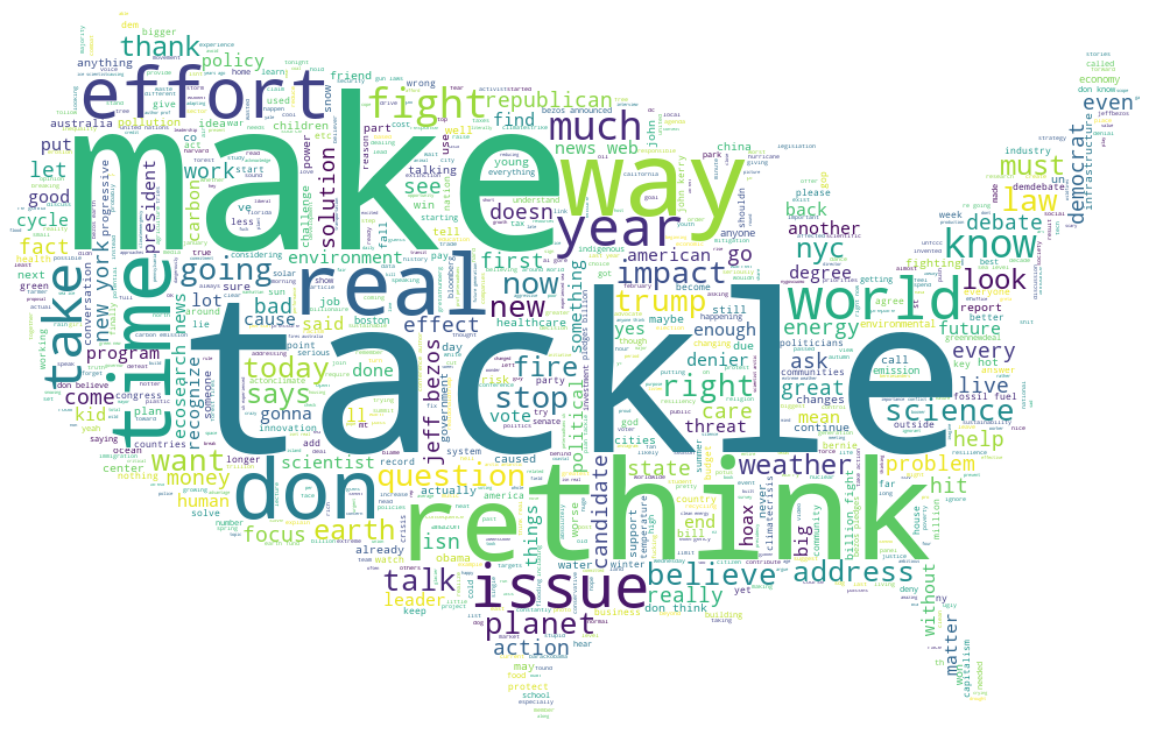

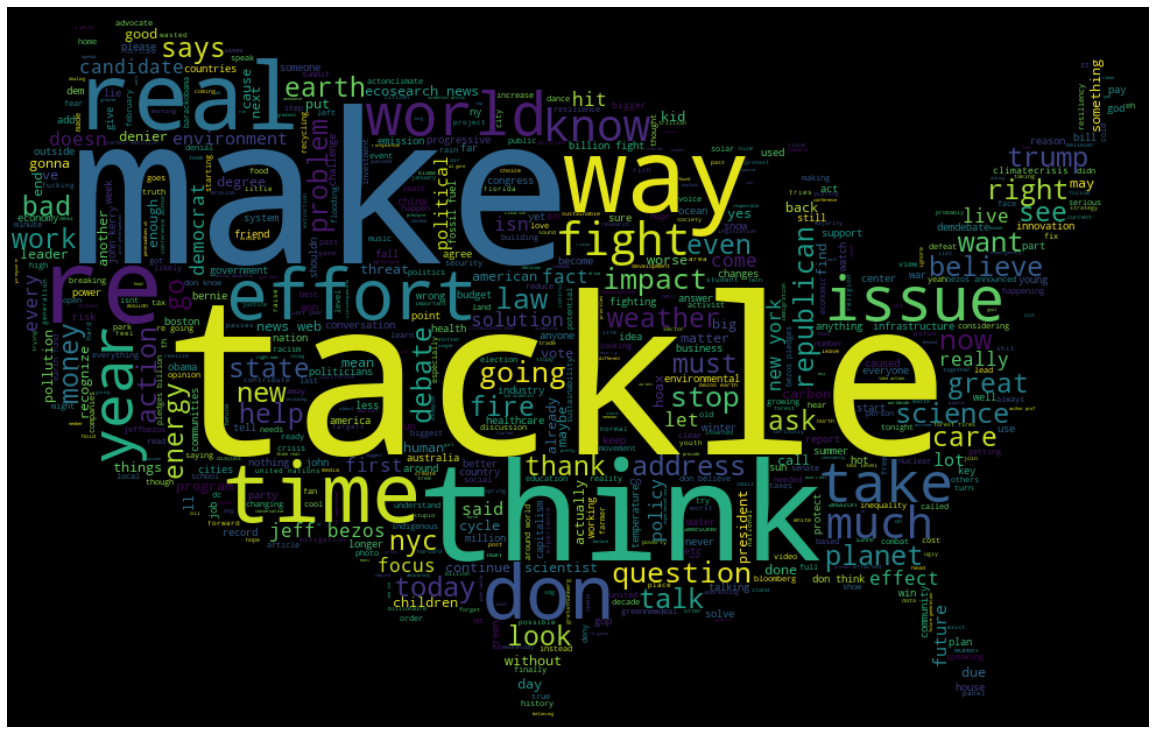

Pred=0


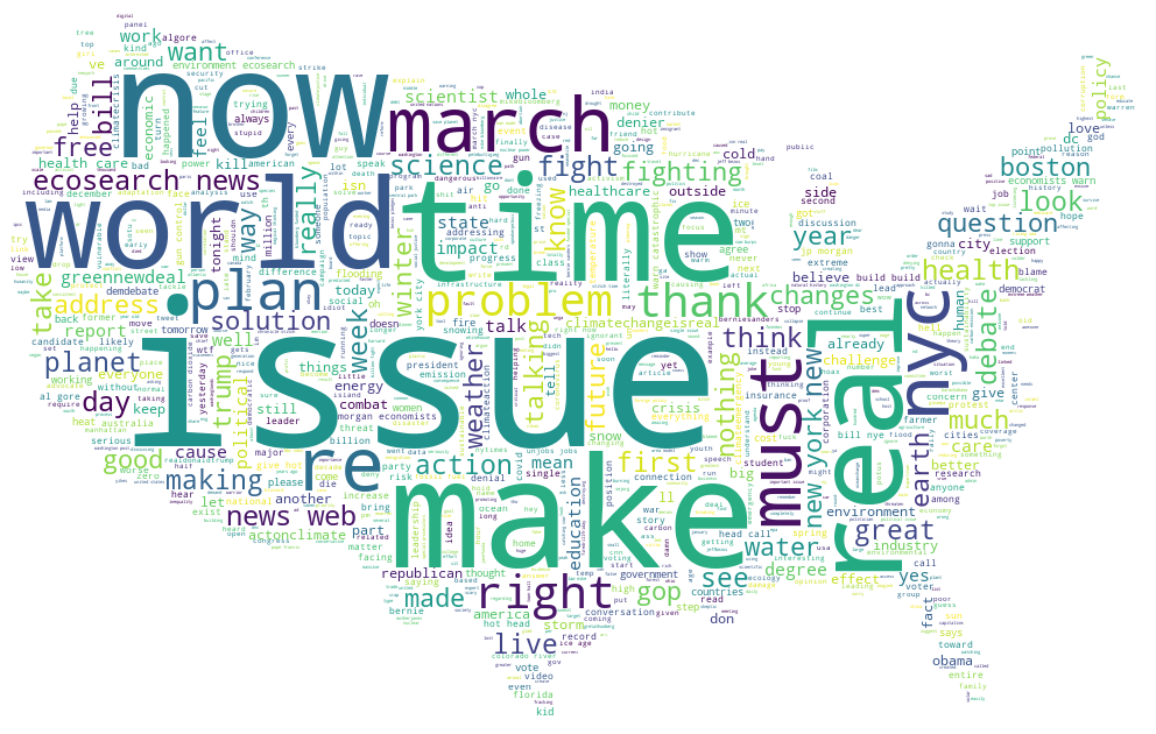

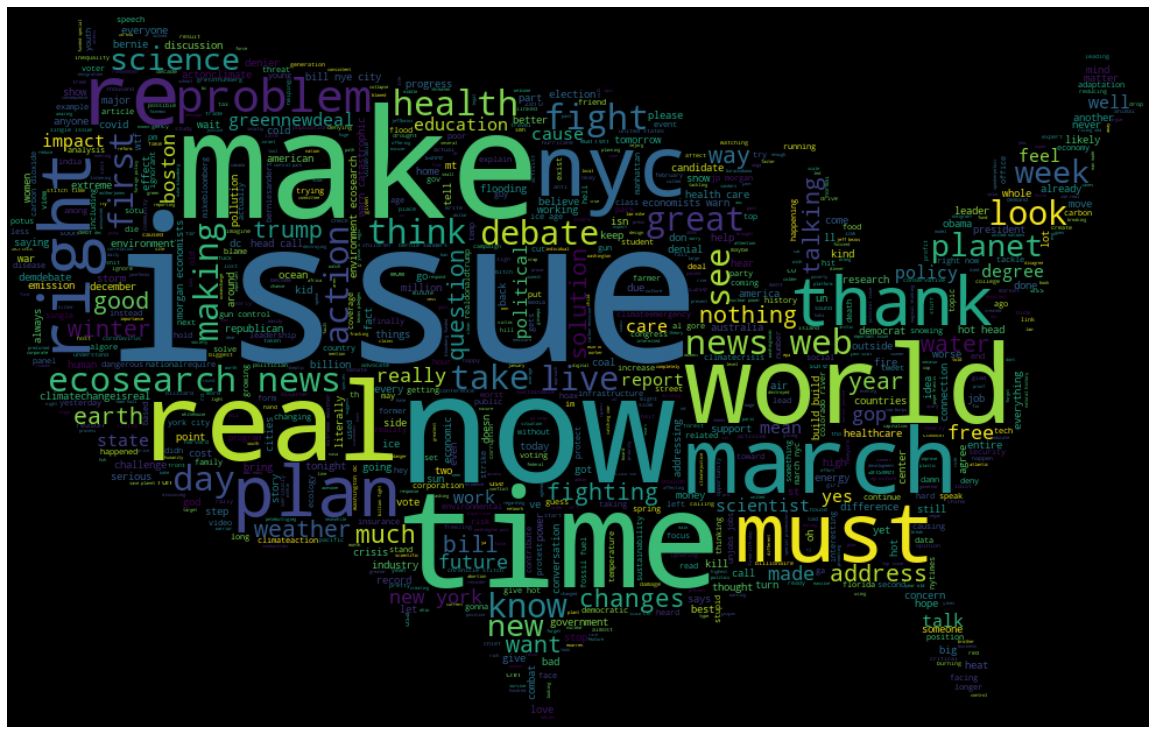

Pred=1


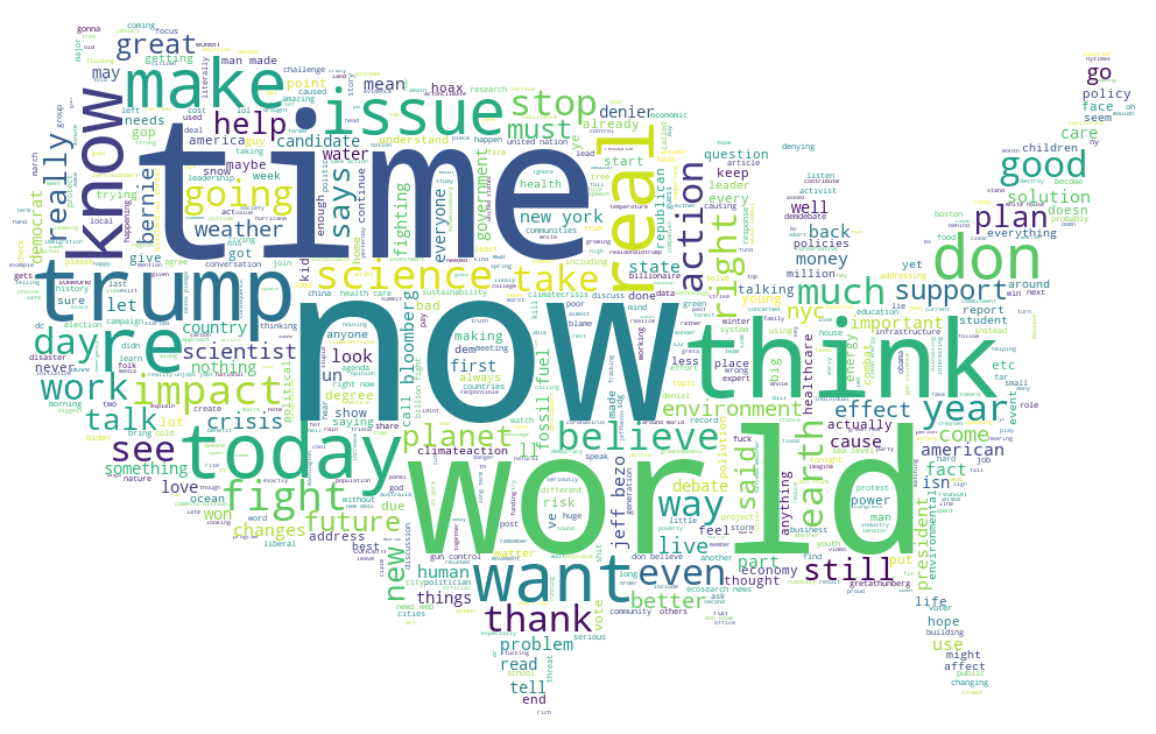

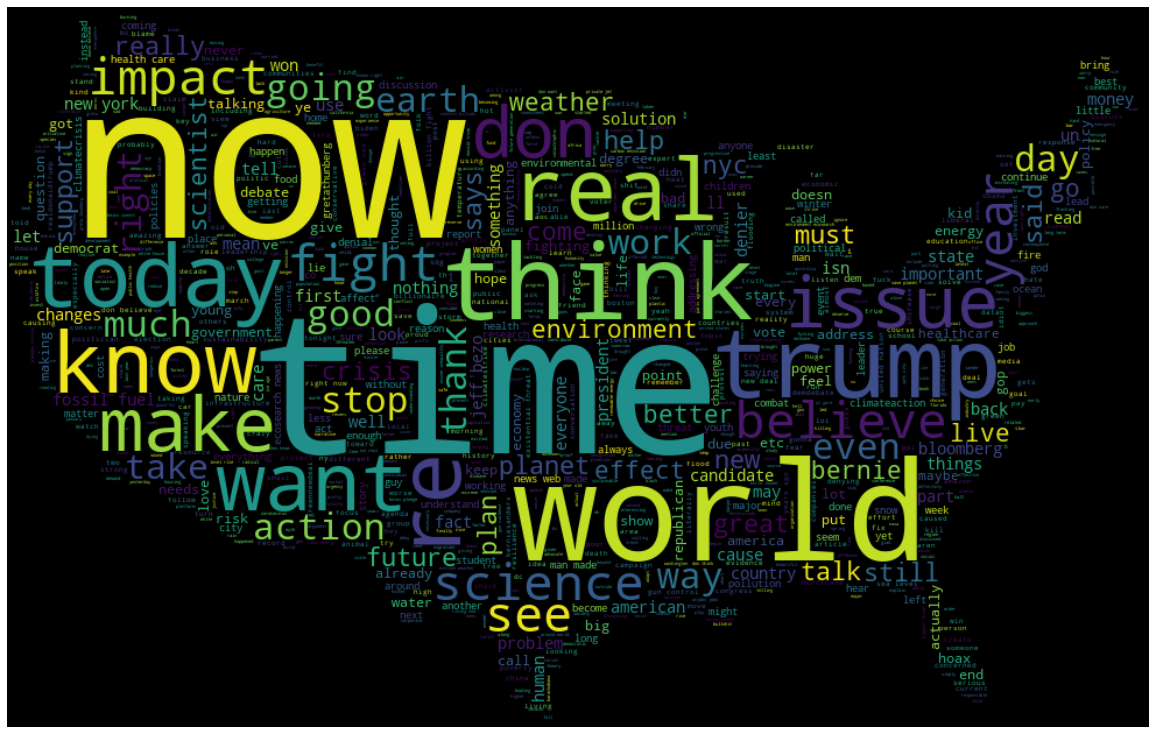

Pred=2


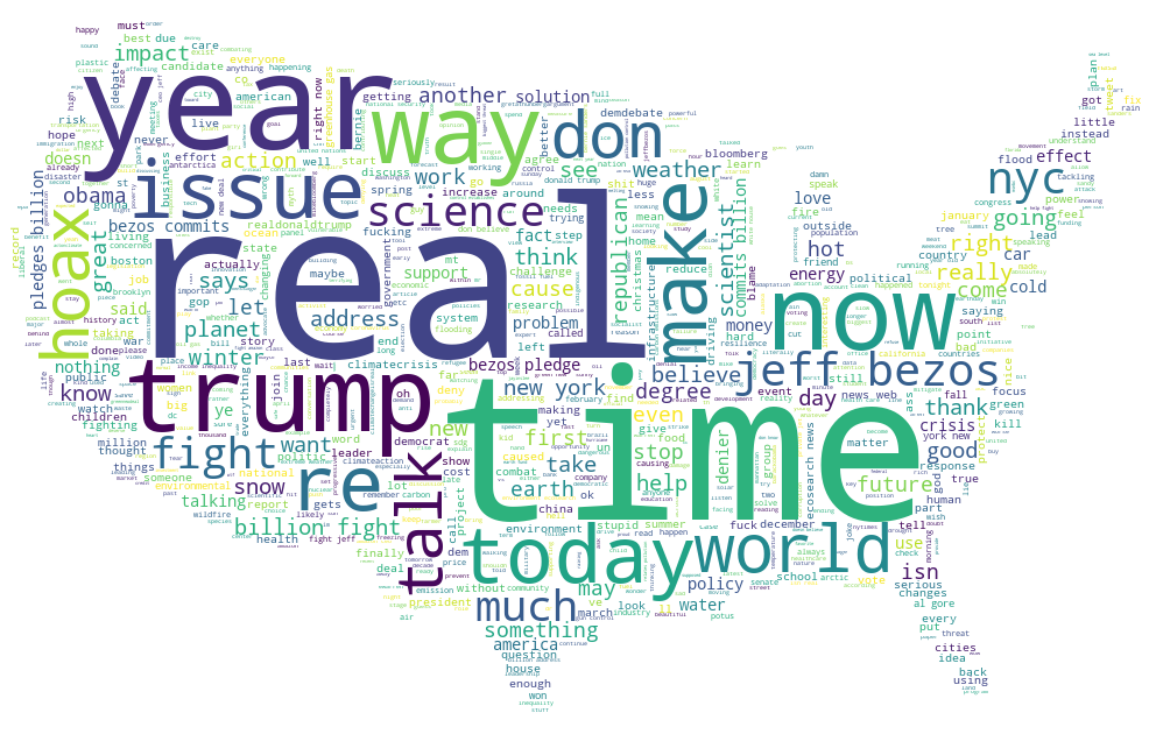

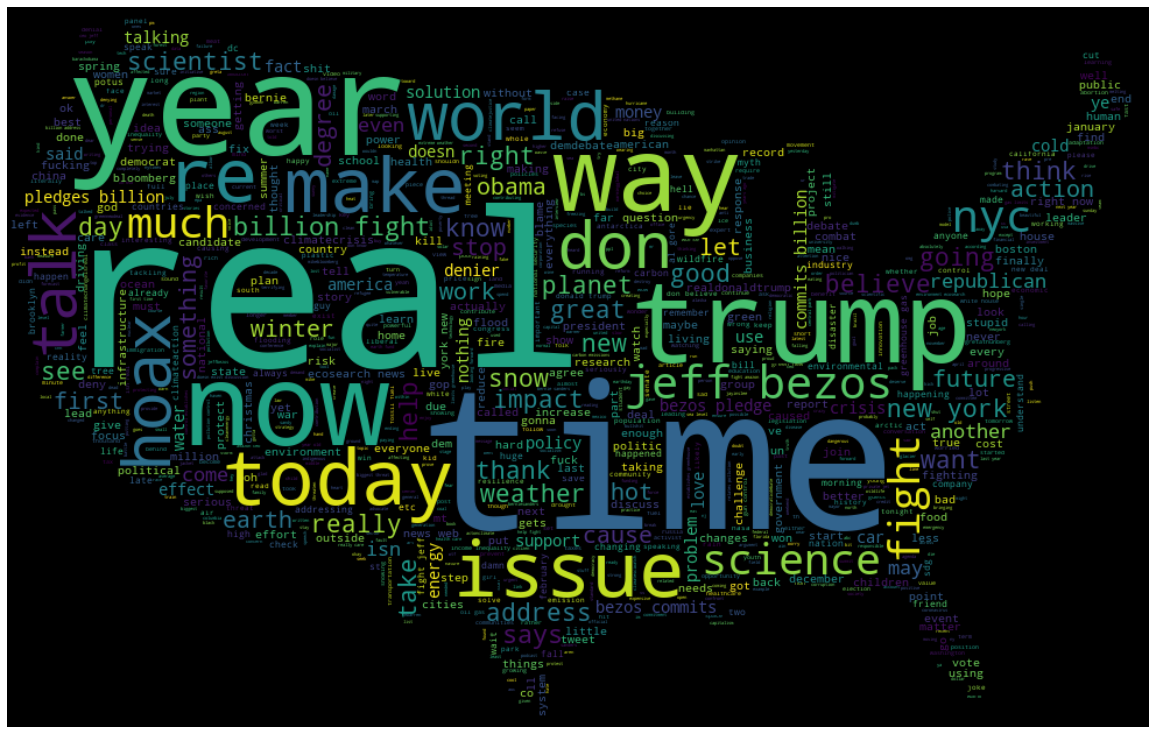

In [46]:
print('Pred=-1')
WorldCloudBuilt_USA(cloud_neg1)
print('Pred=0')
WorldCloudBuilt_USA(cloud_0)
print('Pred=1')
WorldCloudBuilt_USA(cloud_1)
print('Pred=2')
WorldCloudBuilt_USA(cloud_2)

## Climate change sentiment historical evolution

In [47]:
US_tweets=pd.read_csv('CNN_predictions_on_US_tweets.csv',usecols=['date','CNN_pred'])
US_tweets.date=pd.to_datetime(US_tweets.date)
US_tweets['year'] = pd.DatetimeIndex(US_tweets['date']).year
US_tweets['month'] = pd.DatetimeIndex(US_tweets['date']).month
US_tweets = US_tweets[US_tweets['CNN_pred']!=2]
US_tweets.head()

date  CNN_pred  year  month
0 2020-02-24 01:17:39         1  2020      2
1 2020-02-24 01:04:41         0  2020      2
2 2020-02-24 00:23:56         1  2020      2
3 2020-02-24 00:29:27         1  2020      2
4 2020-02-24 01:34:15         1  2020      2

In [48]:
US_sentiment=US_tweets.groupby(['year','month','CNN_pred'])['CNN_pred'].count()

US_sentiment=pd.DataFrame(US_sentiment)
US_sentiment=US_sentiment.rename(columns={'CNN_pred':'sentiment'})
US_sentiment=US_sentiment.reset_index()

US_sentiment_2011=US_sentiment[US_sentiment['year']==2011]
US_sentiment_2012=US_sentiment[US_sentiment['year']==2012]
US_sentiment_2013=US_sentiment[US_sentiment['year']==2013]
US_sentiment_2014=US_sentiment[US_sentiment['year']==2014]
US_sentiment_2015=US_sentiment[US_sentiment['year']==2015]
US_sentiment_2016=US_sentiment[US_sentiment['year']==2016]
US_sentiment_2017=US_sentiment[US_sentiment['year']==2017]
US_sentiment_2018=US_sentiment[US_sentiment['year']==2018]
US_sentiment_2019=US_sentiment[US_sentiment['year']==2019]
US_sentiment_2020=US_sentiment[US_sentiment['year']==2020]

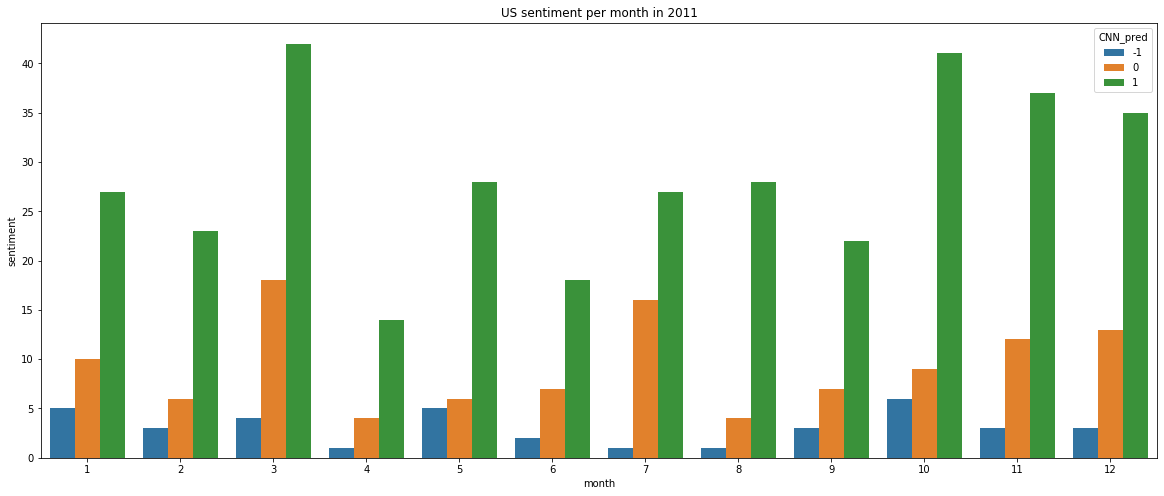

In [49]:
plt.figure(figsize=(20, 8))
plt.title('US sentiment per month in 2011')
sns.barplot(x='month',y='sentiment',data=US_sentiment_2011, hue='CNN_pred')
plt.show()

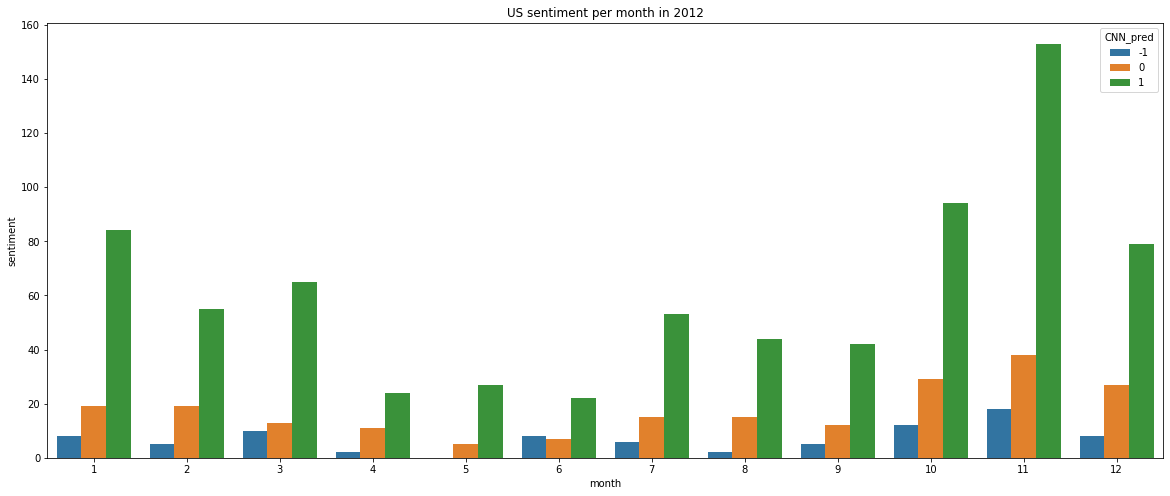

In [50]:
plt.figure(figsize=(20, 8))
plt.title('US sentiment per month in 2012')
sns.barplot(x='month',y='sentiment',data=US_sentiment_2012, hue='CNN_pred')
plt.show()

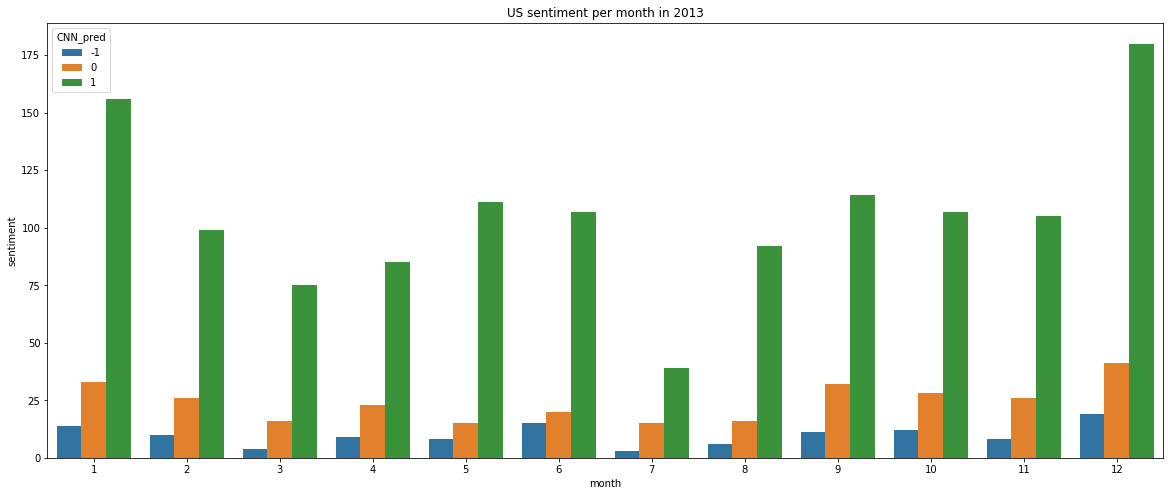

In [51]:
plt.figure(figsize=(20, 8))
plt.title('US sentiment per month in 2013')
sns.barplot(x='month',y='sentiment',data=US_sentiment_2013, hue='CNN_pred')
plt.show()

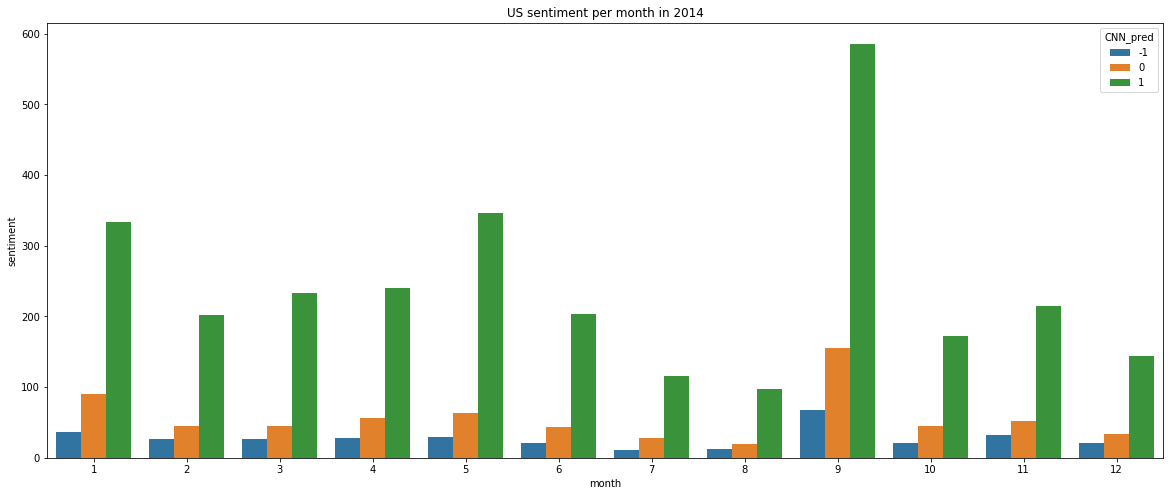

In [52]:
plt.figure(figsize=(20, 8))
plt.title('US sentiment per month in 2014')
sns.barplot(x='month',y='sentiment',data=US_sentiment_2014, hue='CNN_pred')
plt.show()

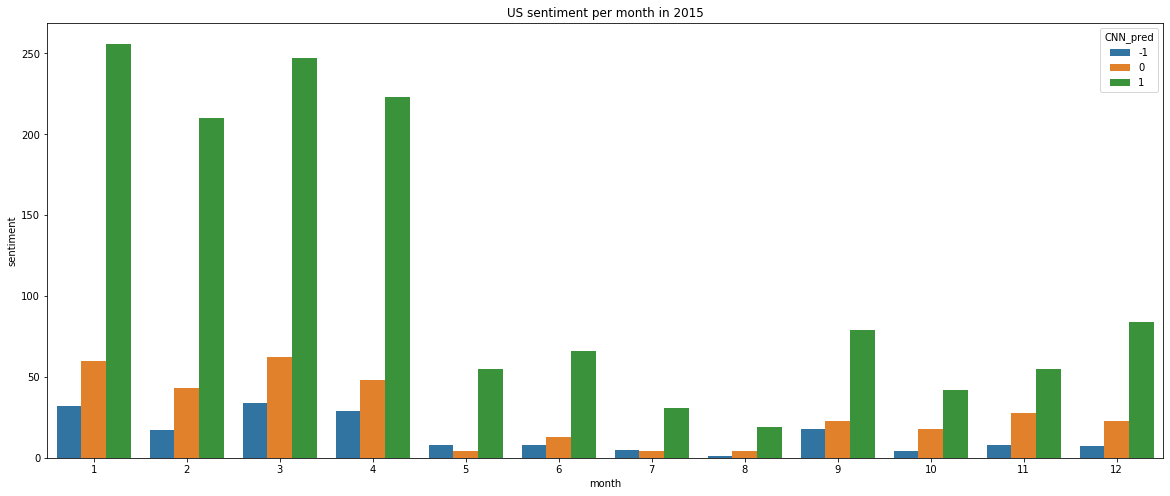

In [53]:
plt.figure(figsize=(20, 8))
plt.title('US sentiment per month in 2015')
sns.barplot(x='month',y='sentiment',data=US_sentiment_2015, hue='CNN_pred')
plt.show()

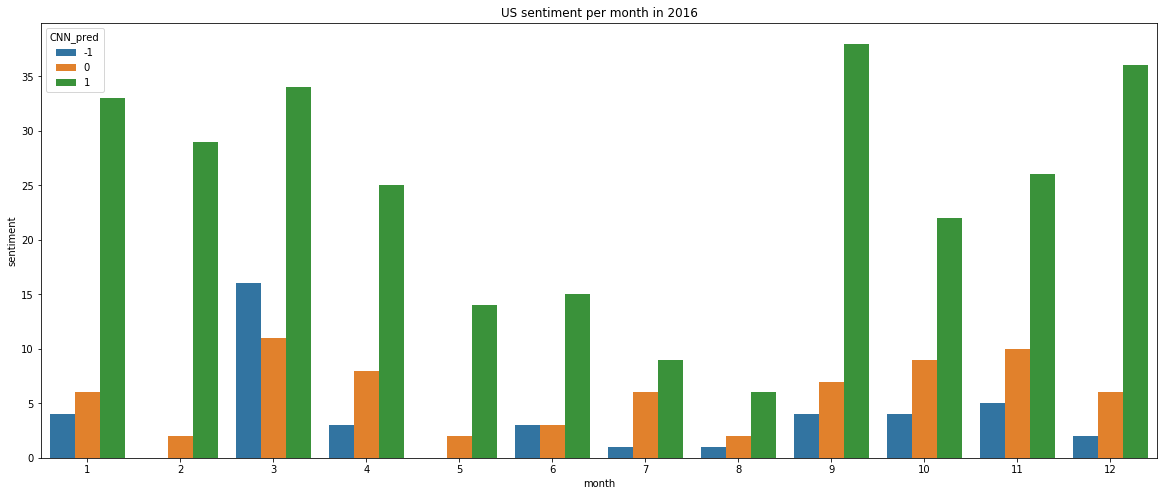

In [54]:
plt.figure(figsize=(20, 8))
plt.title('US sentiment per month in 2016')
sns.barplot(x='month',y='sentiment',data=US_sentiment_2016, hue='CNN_pred')
plt.show()

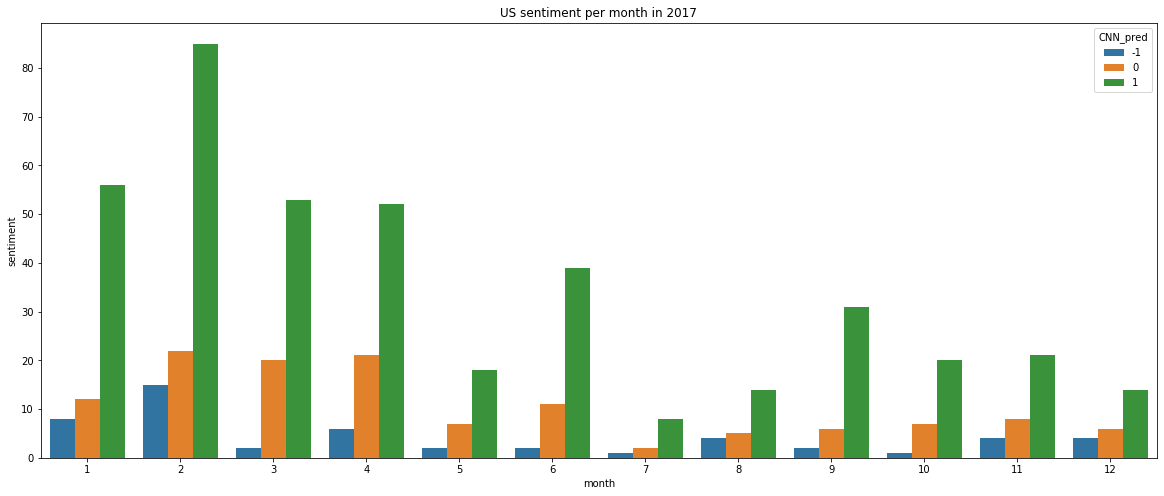

In [55]:
plt.figure(figsize=(20, 8))
plt.title('US sentiment per month in 2017')
sns.barplot(x='month',y='sentiment',data=US_sentiment_2017, hue='CNN_pred')
plt.show()

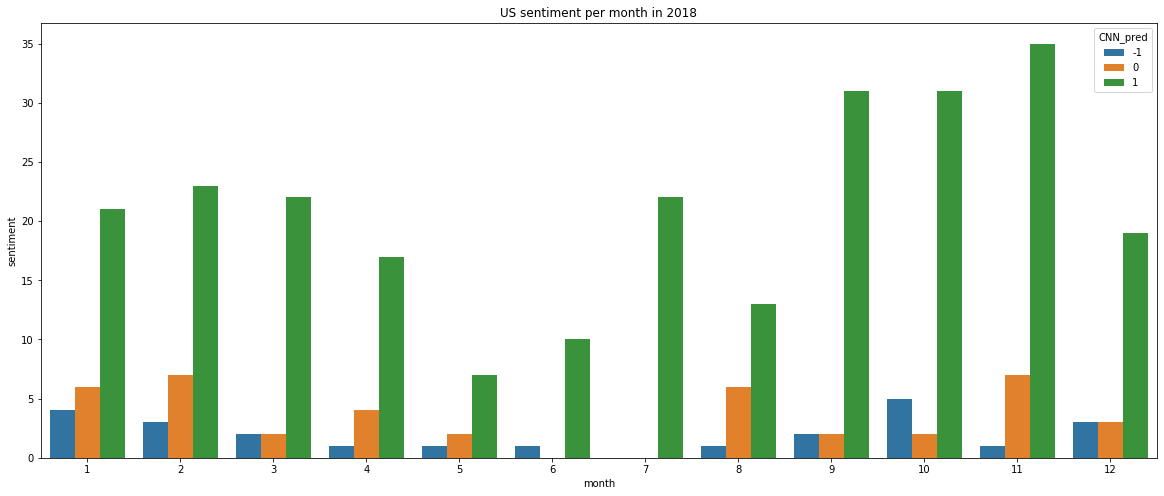

In [56]:
plt.figure(figsize=(20, 8))
plt.title('US sentiment per month in 2018')
sns.barplot(x='month',y='sentiment',data=US_sentiment_2018, hue='CNN_pred')
plt.show()

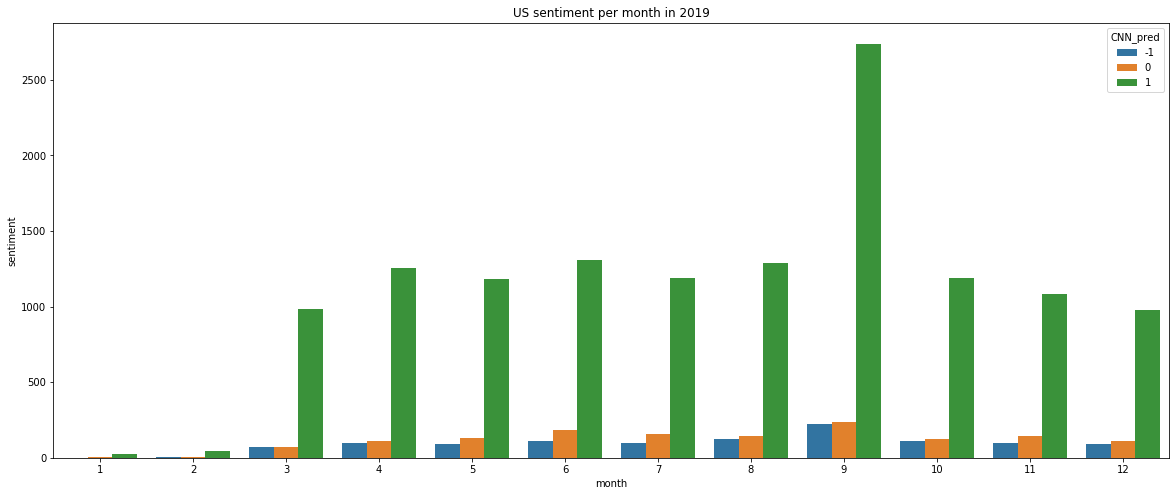

In [57]:
plt.figure(figsize=(20, 8))
plt.title('US sentiment per month in 2019')
sns.barplot(x='month',y='sentiment',data=US_sentiment_2019, hue='CNN_pred')
plt.show()

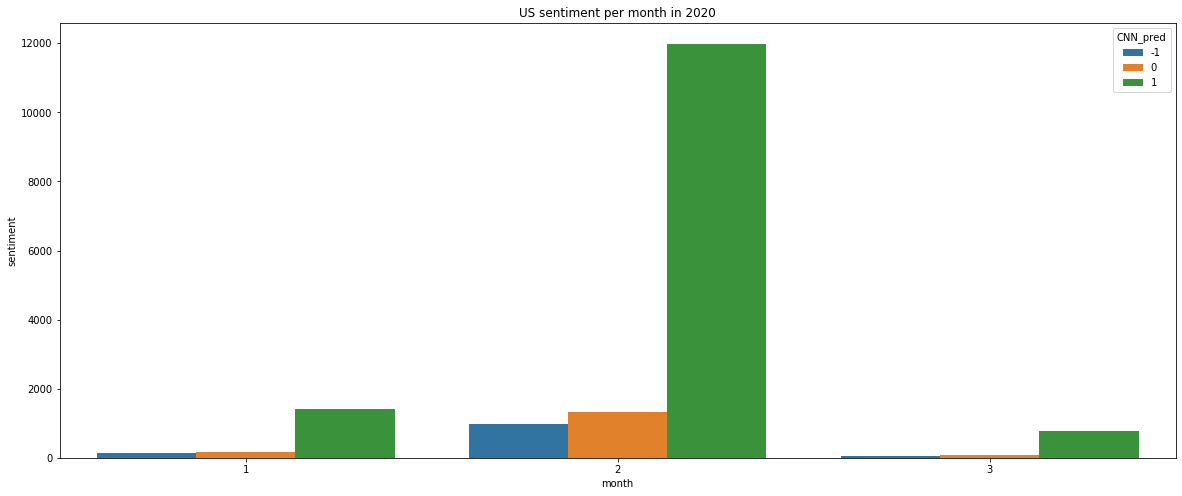

In [58]:
plt.figure(figsize=(20, 8))
plt.title('US sentiment per month in 2020')
sns.barplot(x='month',y='sentiment',data=US_sentiment_2020, hue='CNN_pred')
plt.show()